<table style="float:right"><tr><td>
![Download](images/down.png "Download") 
</td><td>
[v.02](https://drive.google.com/open?id=0Bx8qSVxL9EFmcHk5b1hHWmxVY2s) <br>
(latest version)
</tr></table>
<img src="images/uJ_logo.png" style="float:left; padding-right:20px; margin-top:30px">
### A (mostly) ImageJ's macro library for quantification of bacterial single-cell dynamics in microfluidic devices.


### updates: 
* [v.02_20170529:](https://drive.google.com/open?id=0Bx8qSVxL9EFmcHk5b1hHWmxVY2s) Update: TIF_2_Data
* [v.01_20170515:](https://drive.google.com/open?id=0Bx8qSVxL9EFmcHk5b1hHWmxVY2s) Defines file structure



In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Requirements


### ImageJ version >= 1.51
### PlugIn: Parallel Iterative Deconvolution
    download link=  https://imagej.net/Parallel_Iterative_Deconvolution
    Or copy it from the uJ plugin folder
#### Install instructions: 
    Extract the .zip file into de "plugins" folder inside your Fiji/ImageJ folder
    The go to the ImageJ "jars" folder and move away jtransforms-2.4.jar because it conflicts with the parallelcolt-0.9.4.jar
    
    
### uJ plugins: uJ Key Listener 
#### Install instructions:
     copy uj_keyListener.class from the uJ plugin folder to the Fiji/ImageJ plugin folder

# Image analysis pipeline



### File Structure

uJ has three main folders:

uJ_docs: containing this documentation.

uJ_data: containing all images, data, runMe, setup file, a theoretical PSF image for deconvolution AND SIGNAL.TXT!

uJ_src: contains all the scripts used to process the images, obtain information from the images and produce visualizations


Each Experiment must have its own directory under uJ_data with its respective runMe.ijm and setup.txt files


### Setup file

Make sure that Nikon channels and str_channels are in the right order.

```javascript
dirROOT=/path/to/uJ/
//this experiment data directory:
pathDATA=/path/to/uJ/uJ_data/experiment-folder/

//this experiment label 
expeLabel=Strain-treatment

//A list of positions/traps (can be only one)
list_pos=xy01,xy02,xy03,xy04,xy05,xy06,xy07,xy08,xy09,xy10,xy11,xy12,xy13,xy14,xy15,xy16,xy17,xy18,xy19,xy20,xy21,xy22,xy23,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32,xy33,xy34,xy35,xy36,xy37,xy38,xy39,xy40,xy41,xy42,xy43,xy44,xy45,xy46,xy47,xy48

//A range of frames to be processed (could be a single frame)
list_frames=37-163 

//List of Nikon Eclipse channels
list_channel=c1,c2,c3

// List of channels names to be processed 
str_channel=DIC,DsRed,GFP

//Channel used to produce a segmentable image (0 uses DIC)
segmentable_channel=DsRed+GFP
//segmentable_channel=0

dirECLIPSE=data_eclipse/
dirRAW=data_raw/
dirTIF=data_tif/
dirSEGMENTABLE=data_segmentable/
dirDEEPCELL=data_deepcell/
dirRAWMASKS=data_raw_masks/
dirROIS=data_rois/
dirMASKS=data_masks/
dirDATA=data/
dirMOVIES=data_movies/
dirFIGURES=figures/



```

## RunMe

This is an ImageJ macro that runs all the macros.
To run one macro or not run it you have to comment it or uncomment it.
Comments are by // multi-line comment by /**/


```javascript
//requires("1.51");
print("\\Clear"); 

/*******************/
// User-defined parameters

working_dir="/home/charly/Lab/Projects/uJ/"; //Path to uJ

pathDATA="/home/charly/Lab/Projects/uJ/uJ_data/HT13-Sine-1hr/";  //Path to Experiment


pathUJ=working_dir+"uJ_src/macros/"; //Path to uJ_src
setupFile=pathDATA+"setup.txt"; //Path to setup file

/*******************/
//Run Macro: Eclipse_2_Raw
runMacro(pathUJ+"Eclipse_2_Raw.ijm", setupFile);

/*******************/
//Run Macro: Raw_2_TIF  
//runMacro(pathUJ+"Raw_2_TIF.ijm", setupFile);

/*******************/
//Run Macro: TIF_2_Segmentable
//runMacro(pathUJ+"TIF_2_Segmentable.ijm", setupFile);

/****************/
//Run Macro: Segmentable_2_DeepCell
//runMacro(pathUJ+"Segmentable_2_DeepCell.ijm", setupFile);

/*******************/
//Here we run DeepCell



/**************************/
//Run Macro: DeepCell_to_Raw_Maks
runMacro(pathUJ+"DeepCell_2_RawMasks.ijm", setupFile);

/**************************/




/*******************/
//Run Macro: RawMasks_2_Masks (AUTO)
/*
list_pos=split("xy07,xy08,xy09,xy12,xy13,xy17,xy26,xy27,xy32,xy34",",");  //Should be from setup.txt
for(i=0; i<list_pos.length; i++){
	thisPos=list_pos[i];
	print("*********** "+thisPos);

	thisChannel="DsRed+GFP";
	doAll=1; //if false, manual correction

	args=setupFile+","+thisPos+","+thisChannel+","+doAll;
	runMacro(pathUJ+"RawMask_2_Masks.ijm", args);
}
*/
/*******************/
//Run Macro: TIF_2_Data
/*
list_pos=split("xy08",",");  //Should be from setup.txt
thisChannel="DsRed+GFP";
for(i=0; i<list_pos.length; i++){
	thisPos=list_pos[i];
	args=setupFile+","+thisPos+","+thisChannel;
	runMacro(pathUJ+"TIF_2_Data.ijm", args);
}
*/
/*******************/
//Python: analyze_uJ_HT13.ipynb


/*******************/
//Run Macro: Data_2_Overlay
/*
thisVariable="relativeIntensity";
maskChannel="DsRed+GFP";
bgChannel="DIC";  
lutFile="RdYlBu.lut";
args=setupFile+","+thisVariable+","+maskChannel+","+bgChannel+","+lutFile;
runMacro(pathUJ+"Data_2_Overlay.ijm", args);
*/


/*******************/
//Run Macro: Mask_2_Overlay
/*
bgChannel="DIC";  
maskChannel="DsRed+GFP";
lutFile="RdYlBu.lut";
args=setupFile+","+maskChannel+","+bgChannel+","+lutFile;
runMacro(pathUJ+"Mask_2_Overlay.ijm", args);
*/

/*******************/
//Run Macro: TIF_2_Composite  (DsRed+GFP)
//runMacro(pathUJ+"TIF_2_Composite.ijm", setupFile);


/*******************/
//Run Macro: makeMovie
/*
list_pos=split("xy07"); //,xy08,xy09,xy12,xy13,xy17,xy26,xy27,xy32,xy34",",");  //Should be from setup.txt
thisChannel="relativeIntensity";
for(i=0; i<list_pos.length; i++){
	thisPos=list_pos[i];
	args=setupFile+","+thisPos+","+thisChannel;
	runMacro(pathUJ+"makeMovie.ijm", args);
}
*/```


## PSF function

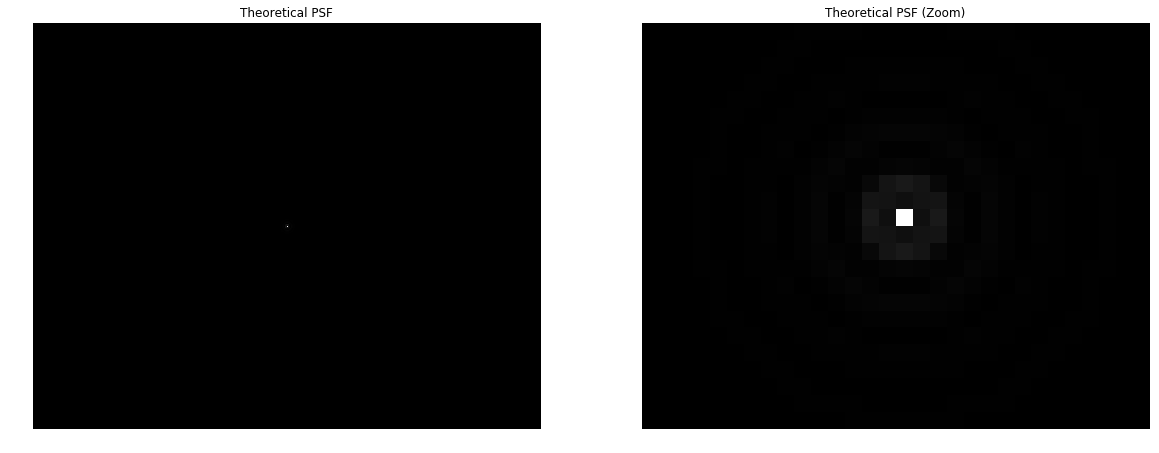

In [3]:
from uPy_functions import *


dic_file="data_sample/Strain-treatment/PSF_Real-16bit.tif"

dic_title="Theoretical PSF"

dic_file2="data_sample/Strain-treatment/PSF_Real-16bit-Zoom.tif"


dic_title2="Theoretical PSF (Zoom)"


show2TIFs(dic_file, dic_file2,dic_title, dic_title2)


---
### Step 1. Eclipse_2_Raw

 
Imports time-lapse images produced by NikonElements and compiles, renames and saves them as separate images.

In ImageJ:
```javascript
runMacro(pathUJ+"Eclipse_2_Raw.ijm", setupFile);
```

Output:

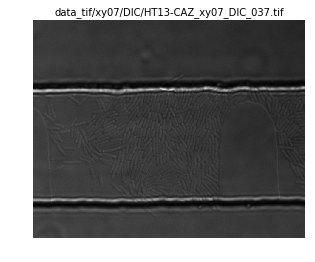

In [4]:
from uPy_functions import *

dic_file="./data_sample/Strain-treatment/data_tif/xy07/DIC/HT13-CAZ_xy07_DIC_037.tif"
dic_title="data_tif/xy07/DIC/HT13-CAZ_xy07_DIC_037.tif"

showTIF(dic_file, title=dic_title)


---
### Step 2. Raw_2_TIF   (not even under development)
For the momemt this script just copies the images from one folder to another.
At some point it should align the traps and maybe join experiments, and correct any indexing complication 



```javascript
runMacro(pathUJ+"Raw_2_TIF.ijm", setupFile);
```

---
### Step 3. TIF_2_Segmentable

* Produces a deconvolutionated image used for image segmentation.
* Any type of image processing is allowed here, as the image is only used for mask detection (e.g. DCNV + ECGB)


```javascript
runMacro(pathUJ+"TIF_2_Segmentable.ijm", setupFile);
```

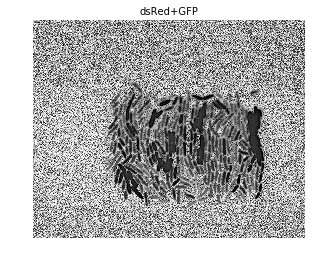

In [5]:
from uPy_functions import *

dic_file="./data_sample/Strain-treatment/data_segmentable/xy01/DsRed+GFP/pBGT-AMP100_xy01_DsRed+GFP_001.tif"
dic_title="dsRed+GFP"

showTIF(dic_file, title=dic_title)

---
### Step 4. Segmentable_2_Deepcell
 
* Prepares imageJ for DeepCell.
* Needs "aligned_000" suffix.

```javascript
runMacro(pathUJ+"Segmentable_2_Deepcell.ijm", setupFile);
```

### Step 5. DeepCell
 
Deconvolutional network for image segmentation.

Output:

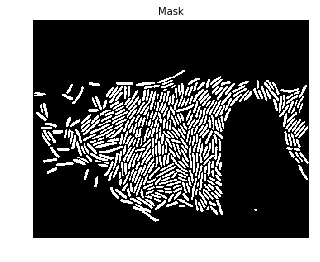

In [6]:
dic_file="data_sample/Strain-treatment/data_deepcell/Masks/xy07/DsRed+GFP/masks_0.tif"
dic_title="Mask"

showTIF(dic_file, title=dic_title)

---
### Step 6. DeepCell_2_RawMasks

* Convert 8 bit
* Resizes masks
* Detect & crop traps.


```javascript
runMacro(pathUJ+"DeepCell_2_RawMasks.ijm", args);
```

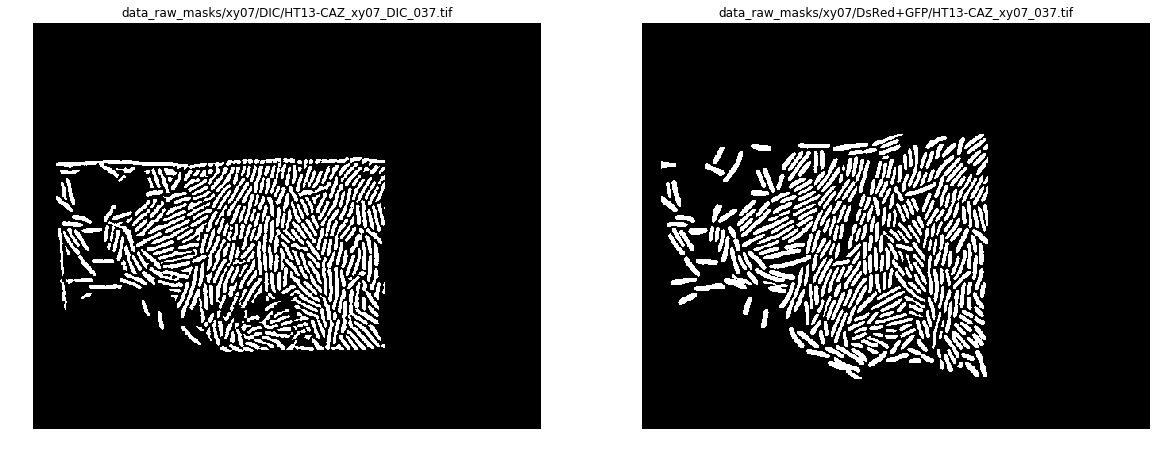

In [7]:

raw_file="data_sample/Strain-treatment/data_raw_masks/xy07/DIC/HT13-CAZ_xy07_DIC_037.tif"
raw_title="data_raw_masks/xy07/DIC/HT13-CAZ_xy07_DIC_037.tif"

mask_file="data_sample/Strain-treatment/data_raw_masks/xy07/DsRed+GFP/HT13-CAZ_xy07_DsRed+GFP_037.tif"
mask_title="data_raw_masks/xy07/DsRed+GFP/HT13-CAZ_xy07_037.tif"

show2TIFs(raw_file, mask_file, raw_title, mask_title)

---
### Step 7. RawMasks_2_Masks

* Automated cell detection from mask.  
* Saves segmented ROIs in the ROI manager.
* Manual cell segmentation correction. 
Use:
<Space>: Re-color 
<Shift> <Space>: Toggle View
<Left-click>: If two cells selected, combine them. Else extend cell.
<Right-click>: Split cells
<Shift> <Left-click>: insert cell
<Shift> <Right-click>: delete cell.
<arrow up>: zoom out
<arrow down>: zoom in
<arrow left>: save/prev frame
<arrow right>: save/next frame
<s>: save
<q>: save/exit

NOTES:
- In RoiManager/Options: Uncheck Associate Show All ROIs with Slices
- Keyboard Listener is an ImageJ Plugin. Copy uJ_keyListener.class in Plugins folder


```javascript
thisPos="xy07";  
thisChannel="DsRed+GFP";

args=setupFile+","+thisPos;//+","+thisChannel;
runMacro(pathUJ+"RawMask_2_Masks.ijm", args);
```

Output:

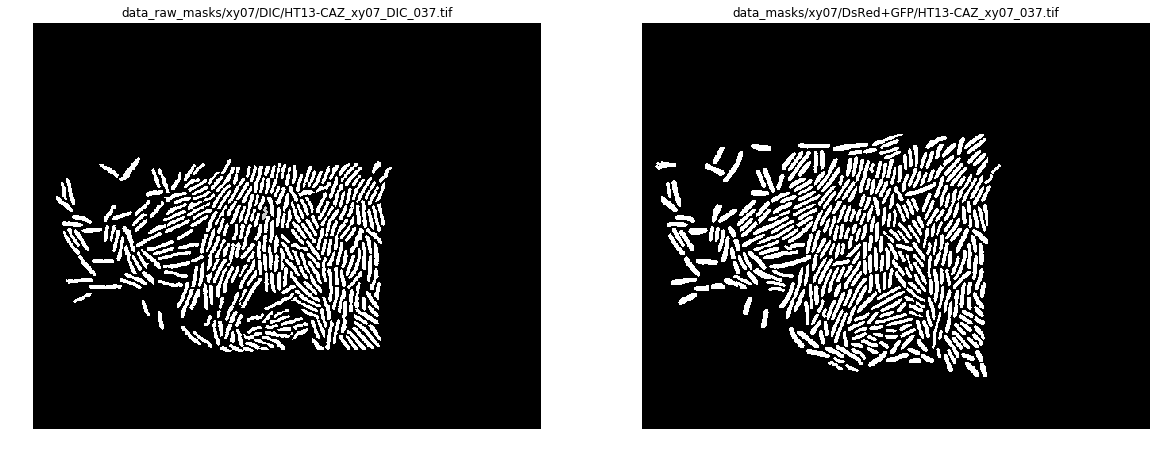

In [8]:
from uPy_functions import *


raw_file="data_sample/Strain-treatment/data_masks/xy07/DIC/HT13-CAZ_xy07_037.tif"
raw_title="data_raw_masks/xy07/DIC/HT13-CAZ_xy07_DIC_037.tif"

mask_file="data_sample/Strain-treatment/data_masks/xy07/DsRed+GFP/HT13-CAZ_xy07_037.tif"
mask_title="data_masks/xy07/DsRed+GFP/HT13-CAZ_xy07_037.tif"

show2TIFs(raw_file, mask_file, raw_title, mask_title)


---
### Step 8. TIF_2_Data

* Quantifies multi-channel mean fluorescence intensity/area/etc of individual cells.
* Data is exported as a tab-separated text file.  One file per image.


```javascript
runMacro(pathUJ+"TIF_2_Data.ijm", args);

```
Output:


---
### Step 9. Data Analysis (Python)

---
### Step 10. Data_2_Overlay


```javascript
runMacro(pathUJ+"Data_2_Overlay.ijm", args);
```

## Additionals


### TIF_2_Montage (on development)
This macro creates a montage sampling each N frames to have a first impression of the results
It also uses the signal.txt file to visualize the treatment.


Output:

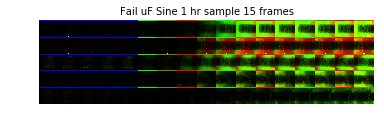

In [9]:


dic_file="data_sample/Strain-treatment/data_montage/HT13-Sine-1hr_Montage_15frames.tif"
dic_title="Fail uF Sine 1 hr sample 15 frames"

showTIF(dic_file, title=dic_title)